<a href="https://colab.research.google.com/github/ElaheGL/Titanic-Survival-Prediction/blob/master/mini%20project3(Titanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project 3 - Titanic</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/front_page.png" width=50%>

## Importing the libraries

In [23]:
# Install required libraries (if needed)
!pip install pandas scikit-learn seaborn matplotlib


In [24]:
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

## Load and Prepare Data

## EDA

In [25]:
import pandas as pd

# URLs for train and test datasets
train_url = "https://raw.githubusercontent.com/ElaheGL/Titanic-Survival-Prediction/master/train.csv"
test_url = "https://raw.githubusercontent.com/ElaheGL/Titanic-Survival-Prediction/master/test.csv"

# Load the datasets
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

# Display the first few rows of the test dataset
test_df.head()

# Optionally, show the first few rows of the train dataset to verify as well
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


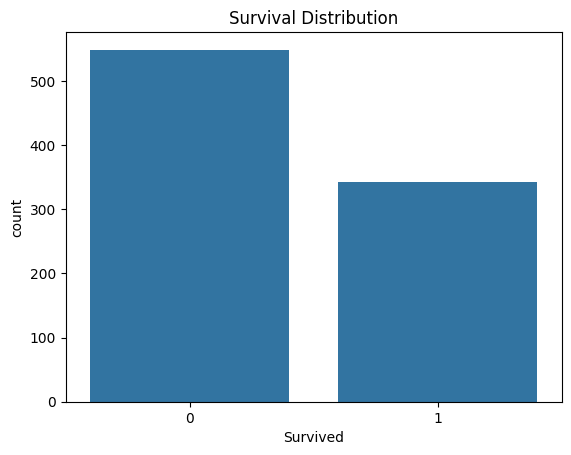

In [27]:
# Check for missing values in the training dataset
train_df.isnull().sum()

# Display a summary of the statistics for numerical columns
train_df.describe()

# Visualize the distribution of the target variable 'Survived'
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=train_df, x='Survived')
plt.title('Survival Distribution')
plt.show()




## Data Preprocessing

In [28]:
# Fill missing values in 'Age' and 'Embarked'
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Check if there are still missing values
train_df.isnull().sum()


<ipython-input-28-bdd15b5a8154>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
<ipython-input-28-bdd15b5a8154>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [29]:
# Encode 'Sex' column as binary (0 = female, 1 = male)
train_df['Sex'] = train_df['Sex'].map({'female': 0, 'male': 1})

# Perform one-hot encoding for 'Embarked'
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)

# Drop columns that won't help in prediction (e.g., 'Name', 'Ticket', 'Cabin')
train_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Display the processed data
train_df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,False,True
1,2,1,1,0,38.0,1,0,71.2833,False,False
2,3,1,3,0,26.0,0,0,7.9250,False,True
3,4,1,1,0,35.0,1,0,53.1000,False,True
4,5,0,3,1,35.0,0,0,8.0500,False,True


In [30]:
# Features and target variable
X = train_df.drop('Survived', axis=1)  # Drop 'Survived' for features
y = train_df['Survived']  # 'Survived' is the target variable


In [31]:
from sklearn.model_selection import train_test_split

# Split data into train and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print(X_train.shape, X_val.shape)


(712, 9) (179, 9)


In [32]:
from sklearn.model_selection import train_test_split

# Split data into train and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print(X_train.shape, X_val.shape)


(712, 9) (179, 9)


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy on validation set: {accuracy:.4f}')


Accuracy on validation set: 0.8436


In [34]:
# Preprocess the test set similarly (fill missing values, encode categorical variables)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df['Sex'] = test_df['Sex'].map({'female': 0, 'male': 1})
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)
test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Make predictions on the test set
test_predictions = model.predict(test_df)

# Prepare the submission dataframe
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': test_predictions})

# Save the predictions to a CSV file
submission.to_csv('submission.csv', index=False)

# Display the first few rows of the submission
submission.head()


<ipython-input-34-bb732b1073e0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
<ipython-input-34-bb732b1073e0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


## Strorytelling - Visualization

## Train your model (Classification)

## Test Result

## Send us the Result (Maktabkhoone)